Analytic Report project

Given the dataset
(https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset), create an analytic report to answer three below questions. 

The report should include the introduction, describing the data, visualizations (scatter plot, bar graph, histogram, boxplot, subplot, pie chart, heatmap, etc., each graph should have an explained analysis followed), filtering data to different categories, analysis (include t-test or Mann-whitney for Hypothesis testing) and conclusions.
#1. What are key factors that are playing into current attrition rates?
#2. What are key factors that are playing into current satisfaction rates?
#3. When are employees leaving?

1. Check size
2. Check missing value 
3. Missing value treatments
4. Descriptive statistic
5. Explore DA
6. Hypothesis testing
7. Feature selection
8. Data cleaning
9. Train/Test split
10. Build model
11. Test model
12. Check stability model

Data Ingest
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [18]:
import pandas as pd

In [30]:
dt = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
dt.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


OBSERVATION :
This is the view of the dataset our target column with which we can point our model to train on would be the "Attrition" column.
Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, we shall handle their numerical encoding in the latter chapter. This section will be devoted to data exploration and as a first step, let us quickly carry our some simple data completeness checks to see if there are nulls or infinite values in the data.

In [24]:
dt.shape

(1470, 20)

In [27]:
dt.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,2.799320,2.761224,7.008163,2.187755
std,9.135373,8.106864,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,1.289271,0.706476,6.126525,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,14.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,29.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,6.000000,4.000000,40.000000,15.000000


In [20]:
dt.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
dt = dt.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate',
              'Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole',
              'Department','JobRole','Education','PercentSalaryHike'], axis=1)
dt.head(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,2,4,Single,5993,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,2,Married,5130,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,1,3,Single,2090,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,3,4,Female,3,1,3,Married,2909,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,2,1,Male,3,1,2,Married,3468,9,No,3,4,1,3,3,2,2


In [22]:
#Check null values

print (pd.isnull(dt).sum())

#There is no NaN values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64


In [28]:
#Check duplicate rows
dt[dt.duplicated(keep='first')].shape
#From the above we can tell there is no duplicate rows.

(0, 20)

In [29]:
dt.dtypes
#All data types are correct.

Age                          int64
Attrition                   object
BusinessTravel              object
DistanceFromHome             int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
dtype: object

In [23]:
#mapping non-numeric values to numeric values
dt_num = dt.copy()
YN_mapping = {"Yes": 1, "No": 0}
dt_num['Attrition'] = dt_num['Attrition'].map(YN_mapping)
dt_num['OverTime'] = dt_num['OverTime'].map(YN_mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
dt_num['BusinessTravel'] = dt_num['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
dt_num['Gender'] = dt_num['Gender'].map(Gender_mapping)
Marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
dt_num['MaritalStatus'] = dt_num['MaritalStatus'].map(Marital_mapping)

dt_num.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,0,1,2,1,3,2,4,0,5993,8,1,3,1,0,0,1,6,0
1,49,0,1,8,3,0,2,2,2,1,5130,1,0,4,4,1,3,3,10,1
2,37,1,0,2,4,0,2,1,3,0,2090,6,1,3,2,0,3,3,0,0


Explore data analysis

In [32]:
!pip3 install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

     |████████████████████████████████| 215kB 506kB/s eta 0:00:01
     |████████████████████████████████| 15.1MB 235kB/s eta 0:00:01    |█▉                              | 860kB 2.9MB/s eta 0:00:05     |█████████████████████           | 9.9MB 3.9MB/s eta 0:00:02
     |████████████████████████████████| 28.4MB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 12.5MB 1.4MB/s eta 0:00:01     |█████████████████████████████▊  | 11.5MB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 10.0MB 240kB/s eta 0:00:01
     |████████████████████████████████| 61kB 621kB/s eta 0:00:01
     |████████████████████████████████| 235kB 726kB/s eta 0:00:01
     |████████████████████████████████| 71kB 948kB/s eta 0:00:01
     |████████████████████████████████| 512kB 2.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


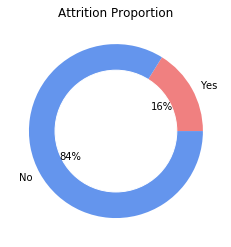

In [34]:
Y_count = len (dt[dt['Attrition'] == 'Yes'])
N_count = len (dt[dt['Attrition'] == 'No'])
#create data
names = 'Yes', 'No'
size = [Y_count, N_count]
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

Text(0, 0.5, 'Frequency of Attrition')

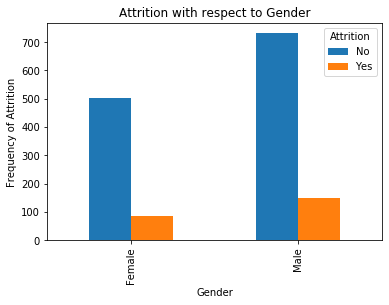

In [37]:
#Breakdown of Attribution data with respect to Gender
pd.crosstab(dt.Gender,dt.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')
#Based on the chart, Gender seems to have some effect on Attrition. 
#It seems like more male employees have been attritioned than the female employees.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

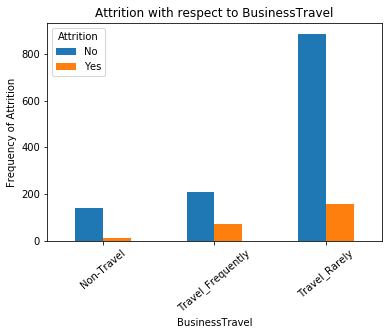

In [38]:
pd.crosstab(dt.BusinessTravel,dt.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)
#The attrition is less in all the cases irrespective of the bussiness travel.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

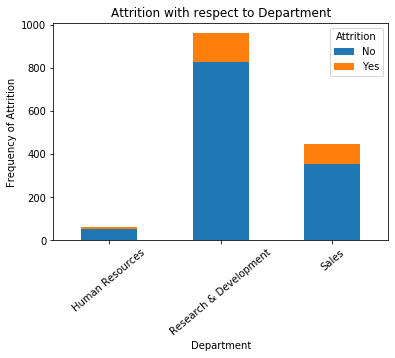

In [39]:
pd.crosstab(dt.Department,dt.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Department attribute has a prominent effect on the target variable and will be useful for modelling and prediction. R&D department has the highest record for attrition,on the other hand it also has the highest number of employees when compared to HR and Sales departments.

Text(0, 0.5, 'Frequency of Attrition')

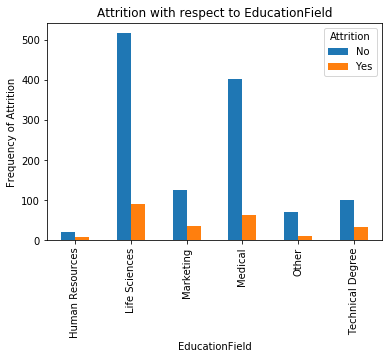

In [40]:
pd.crosstab(dt['EducationField'],dt['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

LifeSciences and Medical fields have the highest number of employees and attrition rate as well. The percentage of employees who have attritioned against those who have been retained seems to be approximately same in all the education fields.

Text(0, 0.5, 'Frequency of Attrition')

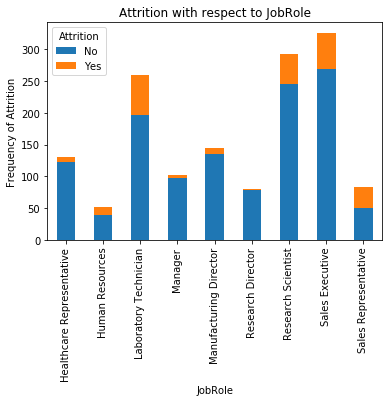

In [41]:
pd.crosstab(dt['JobRole'],dt['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')

Job role seems to have an impact on the attrition rate of employees based on the above plot and we see less attrition in the case of Research Director

Text(0, 0.5, 'Frequency of Attrition')

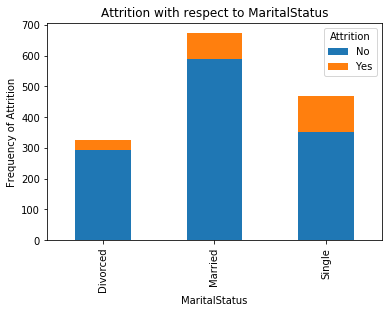

In [42]:
pd.crosstab(dt['MaritalStatus'],dt['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency of Attrition')

There is variation in the data set based on the marital status of employees. Among married and divorced people there is lower rate of attrition when compared to employees who are single.


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


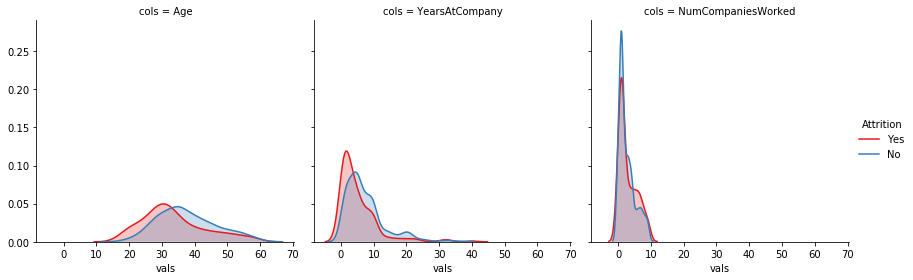

In [43]:
#Objective Factors
Age_YAC_NCW = dt[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())


- Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
- Those who have worked in more than 5 companies tend to attrit => The average time spent in every company is shorter.  

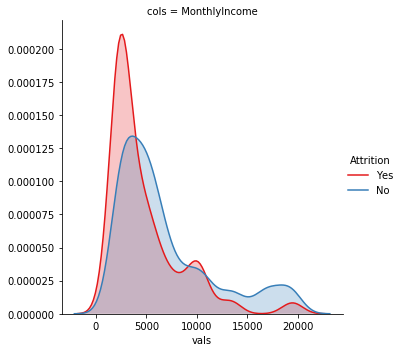

In [44]:
#Return and Bonus
Income = dt[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Employees with low income tend to attrit

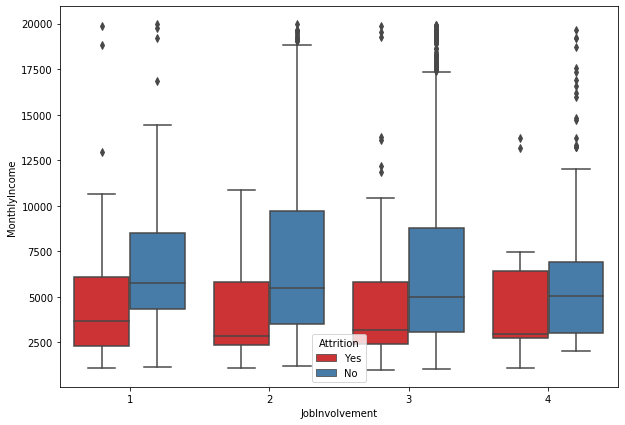

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=IBM_Attrition, palette="Set1")
##Interesting Finding: Low income together with similar involvement is the reason behind attrition

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


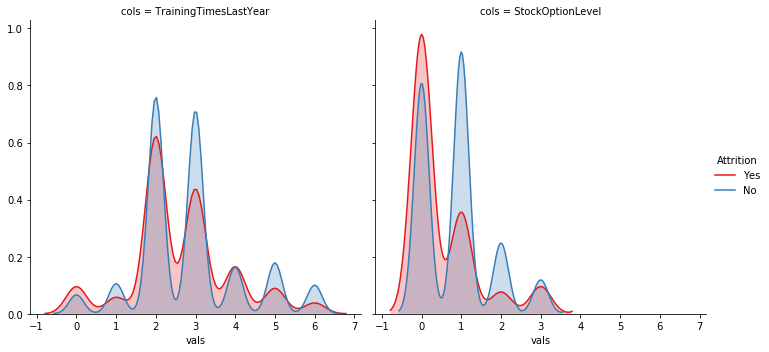

In [46]:
TS = dt[['TrainingTimesLastYear','StockOptionLevel','Attrition']]

TS_melt = TS.melt(['Attrition'], var_name='cols',  value_name='vals')

g = sns.FacetGrid(TS_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

#Employee pay attention to stock option -- when given option, work for the company may increase return.

Satisfaction

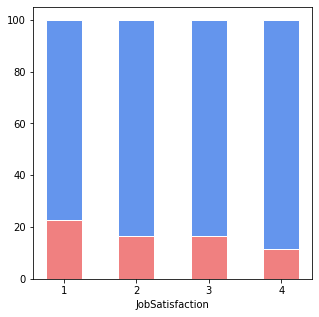

In [47]:
# Data
r = [0,1,2,3]
Y_J1 = len(dt[(dt['Attrition'] == 'Yes') & (dt['JobSatisfaction'] == 1)])
N_J1 = len(dt[(dt['Attrition'] == 'No') & (dt['JobSatisfaction'] == 1)])
Y_J2 = len(dt[(dt['Attrition'] == 'Yes') & (dt['JobSatisfaction'] == 2)])
N_J2 = len(dt[(dt['Attrition'] == 'No') & (dt['JobSatisfaction'] == 2)])
Y_J3 = len(dt[(dt['Attrition'] == 'Yes') & (dt['JobSatisfaction'] == 3)])
N_J3 = len(dt[(dt['Attrition'] == 'No') & (dt['JobSatisfaction'] == 3)])
Y_J4 = len(dt[(dt['Attrition'] == 'Yes') & (dt['JobSatisfaction'] == 4)])
N_J4 = len(dt[(dt['Attrition'] == 'No') & (dt['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")
 
# Show graphic
plt.show()

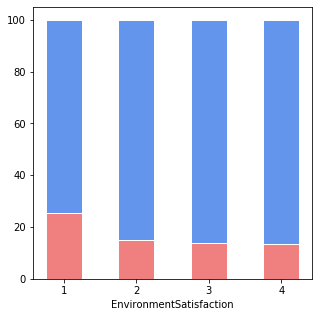

In [48]:
# Data
r = [0,1,2,3]
Y_J1 = len(dt[(dt['Attrition'] == 'Yes') & (dt['EnvironmentSatisfaction'] == 1)])
N_J1 = len(dt[(dt['Attrition'] == 'No') & (dt['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(dt[(dt['Attrition'] == 'Yes') & (dt['EnvironmentSatisfaction'] == 2)])
N_J2 = len(dt[(dt['Attrition'] == 'No') & (dt['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(dt[(dt['Attrition'] == 'Yes') & (dt['EnvironmentSatisfaction'] == 3)])
N_J3 = len(dt[(dt['Attrition'] == 'No') & (dt['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(dt[(dt['Attrition'] == 'Yes') & (dt['EnvironmentSatisfaction'] == 4)])
N_J4 = len(dt[(dt['Attrition'] == 'No') & (dt['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")
 
# Show graphic
plt.show()

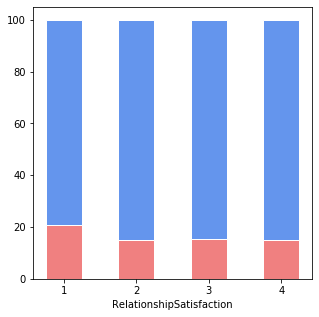

In [49]:
# Data
r = [0,1,2,3]
Y_J1 = len(dt[(dt['Attrition'] == 'Yes') & (dt['RelationshipSatisfaction'] == 1)])
N_J1 = len(dt[(dt['Attrition'] == 'No') & (dt['RelationshipSatisfaction'] == 1)])
Y_J2 = len(dt[(dt['Attrition'] == 'Yes') & (dt['RelationshipSatisfaction'] == 2)])
N_J2 = len(dt[(dt['Attrition'] == 'No') & (dt['RelationshipSatisfaction'] == 2)])
Y_J3 = len(dt[(dt['Attrition'] == 'Yes') & (dt['RelationshipSatisfaction'] == 3)])
N_J3 = len(dt[(dt['Attrition'] == 'No') & (dt['RelationshipSatisfaction'] == 3)])
Y_J4 = len(dt[(dt['Attrition'] == 'Yes') & (dt['RelationshipSatisfaction'] == 4)])
N_J4 = len(dt[(dt['Attrition'] == 'No') & (dt['RelationshipSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("RelationshipSatisfaction")
 
# Show graphic
plt.show()

Conclusion

*Based on the influtial factors analysis *

- They care about to make them work overtime
- Communicate the vision
- Increase employee engagement, especially young employees
- Enhance recognition and rewards programs - Stock option can be a good choice
- Create a pleasant workspace and increase satisfaction